# Week 7 Lstm,Gru and Bidirectional RNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/week7-dataset/Train.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
test_df = pd.read_csv('/kaggle/input/week7-dataset/Test.csv')
test_df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [5]:
valid_df = pd.read_csv('/kaggle/input/week7-dataset/Valid.csv')
valid_df.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


### Perform required text pre-processing – lowering text, removing URLs, punctuation, stop words and correct spelling.

In [6]:
import re
import string
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', "", text)
    text = re.sub('\\W', " ", text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub('<.*?>+', "", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), "", text)
    text = re.sub('\n', "", text)
    text = re.sub('\w*\d\w*', "", text)
    return text

In [7]:
df['text'] = df['text'].apply(clean_text)
df['text']

0        i grew up  b    watching and loving the thunde...
1        when i put this movie in my dvd player  and sa...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
                               ...                        
39995     western union  is something of a forgotten cl...
39996    this movie is an incredible piece of work  it ...
39997    my wife and i watched this movie because we pl...
39998    when i first watched flatliners  i was amazed ...
39999    why would this film be so good  but only gross...
Name: text, Length: 40000, dtype: object

In [8]:
type(df['text'])

pandas.core.series.Series

In [9]:
test_df['text'] = test_df['text'].apply(clean_text)
test_df['text']

0       i always wrote this series off as being a comp...
1        watched       out of  dir steve purcell   typ...
2       this movie was so poorly written and directed ...
3       the most interesting thing about miryang  secr...
4       when i first read about  berlin am meer  i did...
                              ...                        
4995    this is the kind of picture john lassiter woul...
4996    a must see  i saw whipped at a press screening...
4997    nbc should be ashamed  i wouldn t allow my chi...
4998    this movie is a clumsy mishmash of various gho...
4999    formula movie about the illegitimate son of a ...
Name: text, Length: 5000, dtype: object

In [10]:
valid_df['text'] = valid_df['text'].apply(clean_text)
valid_df['text']

0       it s been about  years since sharon stone awar...
1       someone needed to make a car payment    this i...
2       the guidelines state that a comment must conta...
3       this movie is a muddled mish mash of clichés f...
4       before stan laurel became the smaller half of ...
                              ...                        
4995    man  i loved this movie  this really takes me ...
4996    recovery is an incredibly moving piece of work...
4997    you can take the crook out of the joint  but i...
4998    futz is the only show preserved from the exper...
4999     the mother  tells of a recently widowed mid  ...
Name: text, Length: 5000, dtype: object

### Perform tokenization and lemmatization on cleaned data.

In [11]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [13]:
df['text_tokenize'] = df['text'].apply(tokenize_text)
df['text_tokenize']

0        [i, grew, up, b, watching, and, loving, the, t...
1        [when, i, put, this, movie, in, my, dvd, playe...
2        [why, do, people, who, do, not, know, what, a,...
3        [even, though, i, have, great, interest, in, b...
4        [im, a, die, hard, dads, army, fan, and, nothi...
                               ...                        
39995    [western, union, is, something, of, a, forgott...
39996    [this, movie, is, an, incredible, piece, of, w...
39997    [my, wife, and, i, watched, this, movie, becau...
39998    [when, i, first, watched, flatliners, i, was, ...
39999    [why, would, this, film, be, so, good, but, on...
Name: text_tokenize, Length: 40000, dtype: object

In [14]:
test_df['text_tokenize'] = test_df['text'].apply(tokenize_text)
test_df['text_tokenize']

0       [i, always, wrote, this, series, off, as, bein...
1       [watched, out, of, dir, steve, purcell, typica...
2       [this, movie, was, so, poorly, written, and, d...
3       [the, most, interesting, thing, about, miryang...
4       [when, i, first, read, about, berlin, am, meer...
                              ...                        
4995    [this, is, the, kind, of, picture, john, lassi...
4996    [a, must, see, i, saw, whipped, at, a, press, ...
4997    [nbc, should, be, ashamed, i, wouldn, t, allow...
4998    [this, movie, is, a, clumsy, mishmash, of, var...
4999    [formula, movie, about, the, illegitimate, son...
Name: text_tokenize, Length: 5000, dtype: object

In [15]:
valid_df['text_tokenize'] = valid_df['text'].apply(tokenize_text)
valid_df['text_tokenize']

0       [it, s, been, about, years, since, sharon, sto...
1       [someone, needed, to, make, a, car, payment, t...
2       [the, guidelines, state, that, a, comment, mus...
3       [this, movie, is, a, muddled, mish, mash, of, ...
4       [before, stan, laurel, became, the, smaller, h...
                              ...                        
4995    [man, i, loved, this, movie, this, really, tak...
4996    [recovery, is, an, incredibly, moving, piece, ...
4997    [you, can, take, the, crook, out, of, the, joi...
4998    [futz, is, the, only, show, preserved, from, t...
4999    [the, mother, tells, of, a, recently, widowed,...
Name: text_tokenize, Length: 5000, dtype: object

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# Define stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("br")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [18]:
df['text_remove_stopwords'] = df['text_tokenize'].apply(remove_stopwords)
df['text_remove_stopwords']

0        [grew, b, watching, loving, thunderbirds, mate...
1        [put, movie, dvd, player, sat, coke, chips, ex...
2        [people, know, particular, time, past, like, f...
3        [even, though, great, interest, biblical, movi...
4        [im, die, hard, dads, army, fan, nothing, ever...
                               ...                        
39995    [western, union, something, forgotten, classic...
39996    [movie, incredible, piece, work, explores, eve...
39997    [wife, watched, movie, plan, visit, sicily, st...
39998    [first, watched, flatliners, amazed, necessary...
39999    [would, film, good, gross, estimated, award, n...
Name: text_remove_stopwords, Length: 40000, dtype: object

In [19]:
test_df['text_remove_stopwords'] = test_df['text_tokenize'].apply(remove_stopwords)
test_df['text_remove_stopwords']

0       [always, wrote, series, complete, stink, fest,...
1       [watched, dir, steve, purcell, typical, mary, ...
2       [movie, poorly, written, directed, fell, aslee...
3       [interesting, thing, miryang, secret, sunshine...
4       [first, read, berlin, meer, expect, much, thou...
                              ...                        
4995    [kind, picture, john, lassiter, would, making,...
4996    [must, see, saw, whipped, press, screening, hi...
4997    [nbc, ashamed, allow, children, see, definitel...
4998    [movie, clumsy, mishmash, various, ghost, stor...
4999    [formula, movie, illegitimate, son, rich, chil...
Name: text_remove_stopwords, Length: 5000, dtype: object

In [20]:
valid_df['text_remove_stopwords'] = valid_df['text_tokenize'].apply(remove_stopwords)
valid_df['text_remove_stopwords']

0       [years, since, sharon, stone, awarded, viewers...
1       [someone, needed, make, car, payment, truly, a...
2       [guidelines, state, comment, must, contain, mi...
3       [movie, muddled, mish, mash, clichés, recent, ...
4       [stan, laurel, became, smaller, half, time, gr...
                              ...                        
4995    [man, loved, movie, really, takes, back, kid, ...
4996    [recovery, incredibly, moving, piece, work, ha...
4997    [take, crook, joint, seems, exceedingly, diffi...
4998    [futz, show, preserved, experimental, theatre,...
4999    [mother, tells, recently, widowed, mid, mother...
Name: text_remove_stopwords, Length: 5000, dtype: object

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
#to solve the useless problem of nltk
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [22]:
def lemmatize_words(words):
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return lemmatized_words

In [23]:
import nltk

# Download required resources
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
import nltk

# Download required resources
nltk.download('wordnet')
df['lemmatized_text'] = df['text_remove_stopwords'].apply(lemmatize_words)
df['lemmatized_text']

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        [grow, b, watch, love, thunderbirds, mat, scho...
1        [put, movie, dvd, player, sit, coke, chip, exp...
2        [people, know, particular, time, past, like, f...
3        [even, though, great, interest, biblical, movi...
4        [im, die, hard, dads, army, fan, nothing, ever...
                               ...                        
39995    [western, union, something, forget, classic, w...
39996    [movie, incredible, piece, work, explore, ever...
39997    [wife, watch, movie, plan, visit, sicily, stro...
39998    [first, watch, flatliners, amaze, necessary, f...
39999    [would, film, good, gross, estimate, award, no...
Name: lemmatized_text, Length: 40000, dtype: object

In [28]:
test_df['lemmatized_text'] = test_df['text_remove_stopwords'].apply(lemmatize_words)
test_df['lemmatized_text']

0       [always, write, series, complete, stink, fest,...
1       [watch, dir, steve, purcell, typical, mary, ka...
2       [movie, poorly, write, direct, fell, asleep, m...
3       [interest, thing, miryang, secret, sunshine, a...
4       [first, read, berlin, meer, expect, much, thin...
                              ...                        
4995    [kind, picture, john, lassiter, would, make, t...
4996    [must, see, saw, whip, press, screen, hilariou...
4997    [nbc, ashamed, allow, children, see, definitel...
4998    [movie, clumsy, mishmash, various, ghost, stor...
4999    [formula, movie, illegitimate, son, rich, chil...
Name: lemmatized_text, Length: 5000, dtype: object

In [29]:
valid_df['lemmatized_text'] = valid_df['text_remove_stopwords'].apply(lemmatize_words)
valid_df['lemmatized_text']

0       [years, since, sharon, stone, award, viewers, ...
1       [someone, need, make, car, payment, truly, awf...
2       [guidelines, state, comment, must, contain, mi...
3       [movie, muddle, mish, mash, clichés, recent, c...
4       [stan, laurel, become, smaller, half, time, gr...
                              ...                        
4995    [man, love, movie, really, take, back, kid, da...
4996    [recovery, incredibly, move, piece, work, hand...
4997    [take, crook, joint, seem, exceedingly, diffic...
4998    [futz, show, preserve, experimental, theatre, ...
4999    [mother, tell, recently, widow, mid, mother, t...
Name: lemmatized_text, Length: 5000, dtype: object

In [30]:
# Assuming 'train_data' is your DataFrame
df['final_text'] = df['lemmatized_text'].apply(lambda x: ' '.join(x))  # Join the list of words into a single string
test_df['final_text'] = test_df['lemmatized_text'].apply(lambda x: ' '.join(x))
valid_df['final_text'] = valid_df['lemmatized_text'].apply(lambda x: ' '.join(x))


In [31]:
train_texts = df['final_text'].values

In [32]:
df['final_text']

0        grow b watch love thunderbirds mat school watc...
1        put movie dvd player sit coke chip expectation...
2        people know particular time past like feel nee...
3        even though great interest biblical movies bor...
4        im die hard dads army fan nothing ever change ...
                               ...                        
39995    western union something forget classic western...
39996    movie incredible piece work explore every nook...
39997    wife watch movie plan visit sicily stromboli s...
39998    first watch flatliners amaze necessary feature...
39999    would film good gross estimate award nominatio...
Name: final_text, Length: 40000, dtype: object

### Visualize the most frequent words and bigrams.

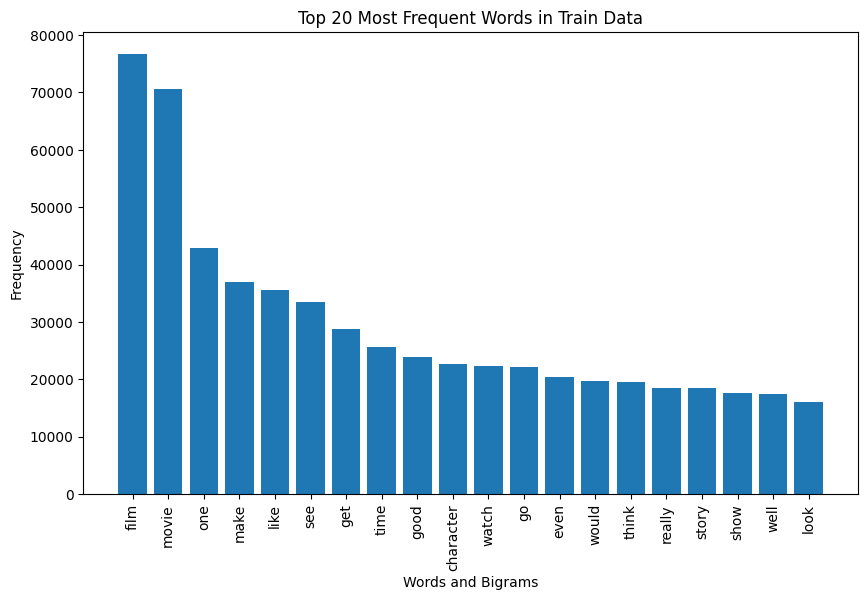

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 1))
cv_train = cv.fit_transform(df['final_text'])

word_freq = pd.DataFrame(cv_train.sum(axis=0), columns=cv.get_feature_names_out()).T.sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_freq.index[:20], word_freq.iloc[:20, 0])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Words in Train Data')
plt.xlabel('Words and Bigrams')
plt.ylabel('Frequency')
plt.show()

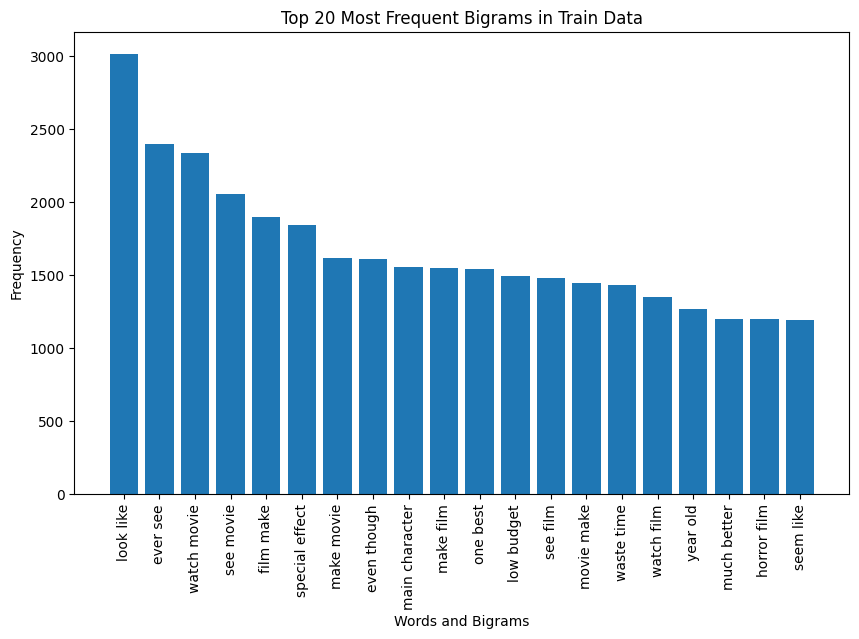

In [34]:
cv = CountVectorizer(ngram_range=(2, 2))
cv_train = cv.fit_transform(df['final_text'])

word_freq = pd.DataFrame(cv_train.sum(axis=0), columns=cv.get_feature_names_out()).T.sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_freq.index[:20], word_freq.iloc[:20, 0])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Bigrams in Train Data')
plt.xlabel('Words and Bigrams')
plt.ylabel('Frequency')
plt.show()

### Visualize the practical words that represent positive and negative sentiment in the dataset.

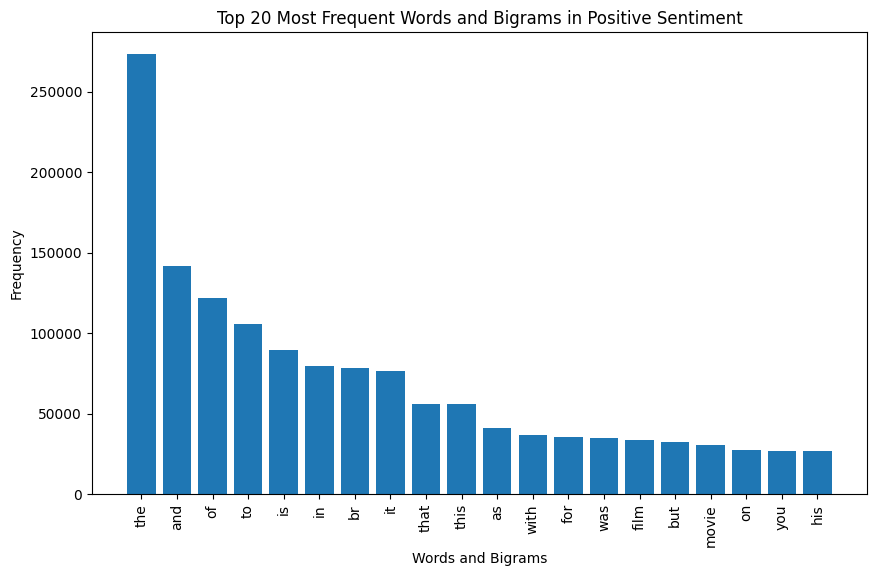

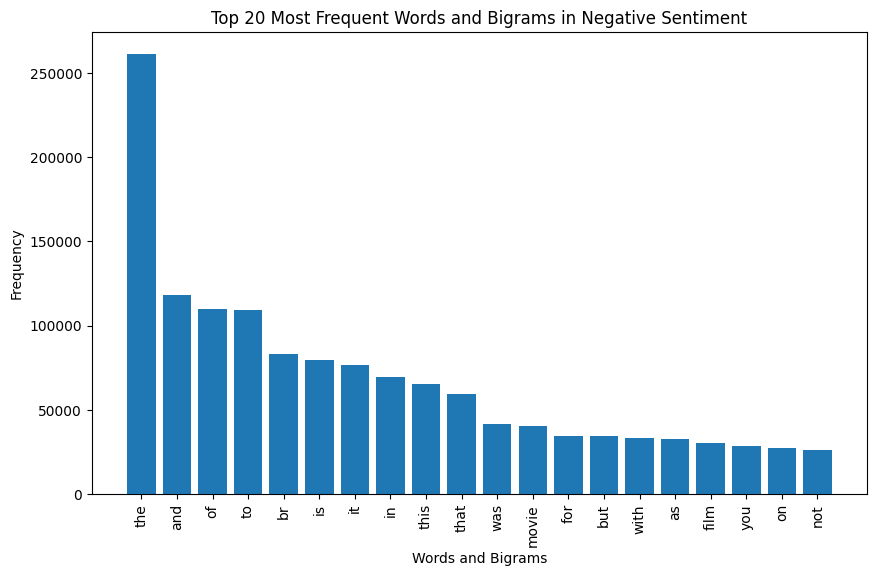

In [35]:
pos_df = df[df['label'] == 1]
neg_df = df[df['label'] == 0]

cv_pos = CountVectorizer(ngram_range=(1, 1))
cv_neg = CountVectorizer(ngram_range=(1, 1))
cv_train_pos = cv_pos.fit_transform(pos_df.iloc[:, 0])
cv_train_neg = cv_neg.fit_transform(neg_df.iloc[:, 0])

word_freq_pos = pd.DataFrame(cv_train_pos.sum(axis=0), columns=cv_pos.get_feature_names_out()).T.sort_values(by=0, ascending=False)
word_freq_neg = pd.DataFrame(cv_train_neg.sum(axis=0), columns=cv_neg.get_feature_names_out()).T.sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_freq_pos.index[:20], word_freq_pos.iloc[:20, 0])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Words and Bigrams in Positive Sentiment')
plt.xlabel('Words and Bigrams')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(word_freq_neg.index[:20], word_freq_neg.iloc[:20, 0])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Words and Bigrams in Negative Sentiment')
plt.xlabel('Words and Bigrams')
plt.ylabel('Frequency')
plt.show()

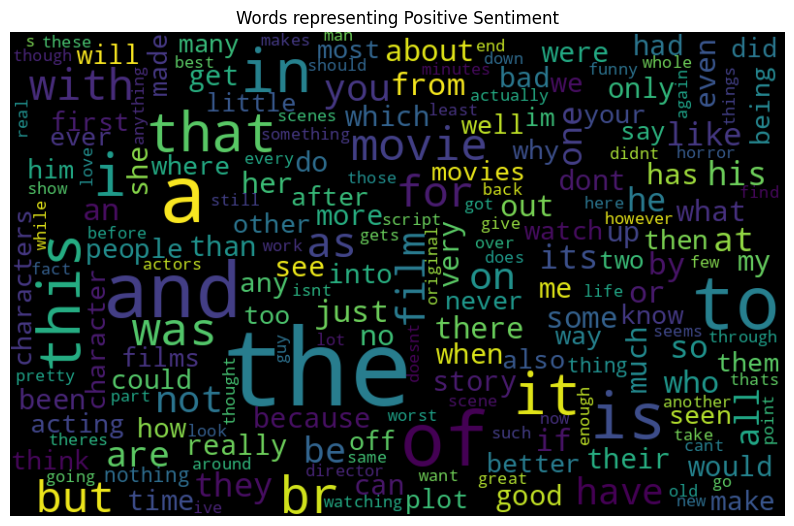

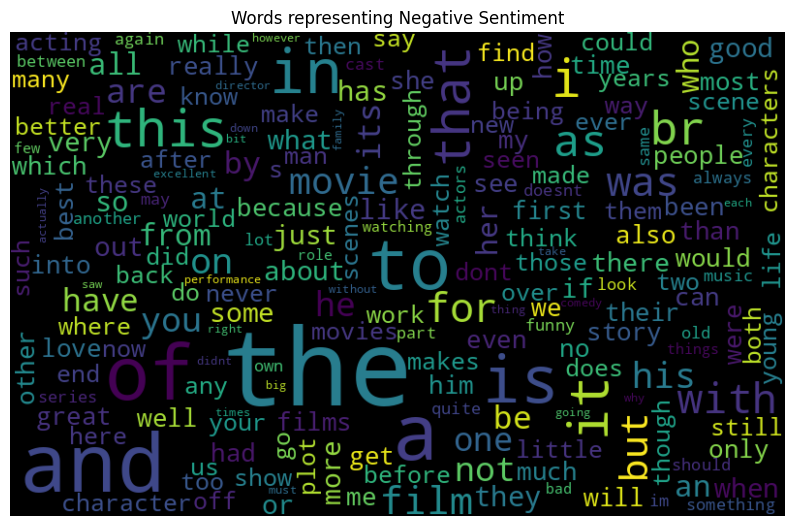

In [72]:
from wordcloud import WordCloud
from collections import Counter
positive_text = df[df['label'] == 0]['text'].values
negative_text = df[df['label'] == 1]['text'].values

positive_freq = Counter(" ".join(positive_text).split())
negative_freq = Counter(" ".join(negative_text).split())

positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(positive_freq)
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(negative_freq)

plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Words representing Positive Sentiment')
plt.show()

plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Words representing Negative Sentiment')
plt.show()

### Create an embedding layer and build the following models for predicting the sentiment:
a. 3-layer LSTM,
b. 3-Layer GRU and,
c. 4-layer Bidirectional LSTM

In [36]:
VOCAB_SIZE = 10000
MAX_LENGTH = 200
OUTPUT_DIM = 128

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 1. Initialize the Tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(df['final_text'])
train_sequences = tokenizer.texts_to_sequences(df['final_text'])
train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

In [38]:
train_sequences

array([[ 447,  395,   11, ...,    0,    0,    0],
       [ 129,    2,  174, ...,    0,    0,    0],
       [  26,   22,  711, ...,    0,    0,    0],
       ...,
       [ 224,   11,    2, ...,    0,    0,    0],
       [  31,   11, 9400, ...,    0,    0,    0],
       [  14,    1,    9, ...,    0,    0,    0]], dtype=int32)

In [39]:
# Convert validation texts to sequences using the same tokenizer
val_sequences = tokenizer.texts_to_sequences(valid_df['final_text'])
val_sequences = pad_sequences(val_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

# Convert test texts to sequences using the same tokenizer
test_sequences = tokenizer.texts_to_sequences(test_df['final_text'])
test_sequences = pad_sequences(test_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

In [40]:
val_sequences

array([[   69,   145,  5827, ...,  1812,   471,  5795],
       [  190,   113,     4, ...,     0,     0,     0],
       [11591,   475,   320, ...,     0,     0,     0],
       ...,
       [   33,  2873,  5897, ...,     0,     0,     0],
       [   18,  4991,  3923, ...,     0,     0,     0],
       [  300,    79,   856, ...,     0,     0,     0]], dtype=int32)

In [41]:
train_labels= pd.get_dummies(df['label']).values
test_labels= pd.get_dummies(test_df['label']).values
val_labels= pd.get_dummies(valid_df['label']).values

In [42]:
train_labels

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False,  True],
       [False,  True]])

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
lstm_model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=OUTPUT_DIM, input_length=MAX_LENGTH),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    LSTM(32),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation="sigmoid"),
])
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
lstm_model.summary()#since did dummies we get test as 2 labels so 2 neurons we are using in the output

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
lstm_hist = lstm_model.fit(train_sequences, train_labels, epochs=3, validation_data=(val_sequences, val_labels))

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 36ms/step - accuracy: 0.4965 - loss: 0.9117 - val_accuracy: 0.5054 - val_loss: 0.6974
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.5152 - loss: 0.7825 - val_accuracy: 0.6472 - val_loss: 1.0172
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.8149 - loss: 0.4565 - val_accuracy: 0.8064 - val_loss: 0.3942


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
gru_model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=OUTPUT_DIM, input_length=MAX_LENGTH),
    GRU(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    GRU(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    GRU(64),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation="sigmoid"),
])
gru_model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
gru_hist = gru_model.fit(train_sequences, train_labels, epochs=3, validation_data=(val_sequences, val_labels))

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 36ms/step - accuracy: 0.4966 - loss: 0.9339 - val_accuracy: 0.5090 - val_loss: 0.6961
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.4993 - loss: 0.8171 - val_accuracy: 0.5106 - val_loss: 0.6939
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.5060 - loss: 0.7797 - val_accuracy: 0.5894 - val_loss: 0.6895


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
bid_model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=OUTPUT_DIM, input_length=MAX_LENGTH),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation="sigmoid"),
])
bid_model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
bid_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
bid_hist = bid_model.fit(train_sequences, train_labels, epochs=3, validation_data=(val_sequences, val_labels))

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 94ms/step - accuracy: 0.5554 - loss: 0.9349 - val_accuracy: 0.8542 - val_loss: 0.3751
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 117s 93ms/step - accuracy: 0.8564 - loss: 0.4105 - val_accuracy: 0.7064 - val_loss: 0.8193
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 117s 93ms/step - accuracy: 0.8989 - loss: 0.2966 - val_accuracy: 0.8676 - val_loss: 0.3263


### Train, Evaluate, Test the models. Plot the performance curves and tabulate accuracy. Which model performed the best?

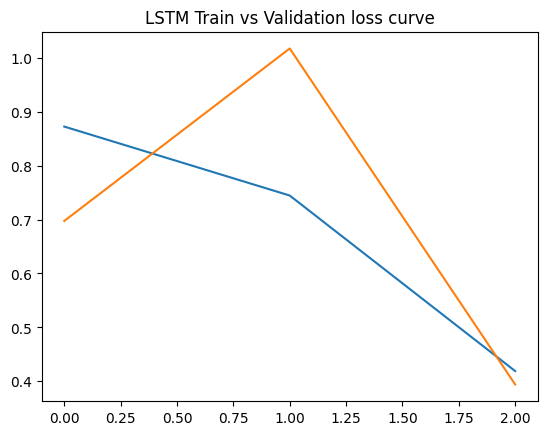

In [49]:
plt.title("LSTM Train vs Validation loss curve")
plt.plot(range(3), lstm_hist.history["loss"])
plt.plot(range(3), lstm_hist.history["val_loss"])

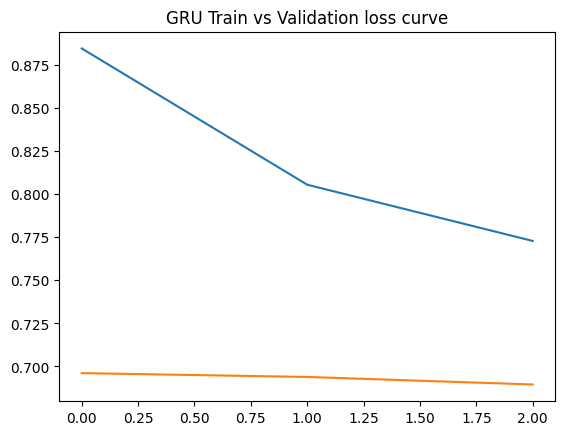

In [50]:
plt.title("GRU Train vs Validation loss curve")
plt.plot(range(3), gru_hist.history["loss"])
plt.plot(range(3), gru_hist.history["val_loss"])

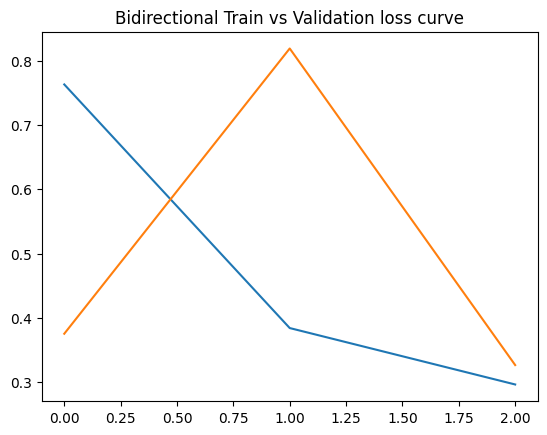

In [51]:
plt.title("Bidirectional Train vs Validation loss curve")
plt.plot(range(3), bid_hist.history["loss"])
plt.plot(range(3), bid_hist.history["val_loss"])

In [56]:
labels = test_df['label'].values
labels

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
predictions = lstm_model.predict(test_sequences)
predicted_labels = [int(round(np.argmax(x))) for x in predictions]

correct_predictions = sum([predicted_labels[i] == labels[i] for i in range(len(labels))])

lstm_accuracy = correct_predictions / len(labels)
lstm_accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


0.8112

In [62]:
predictions = gru_model.predict(test_sequences)
predicted_labels = [int(round(np.argmax(x))) for x in predictions]

correct_predictions = sum([predicted_labels[i] == labels[i] for i in range(len(labels))])

gru_accuracy = correct_predictions / len(labels)
gru_accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


0.5748

In [63]:
predictions = bid_model.predict(test_sequences)
predicted_labels = [int(round(np.argmax(x))) for x in predictions]

correct_predictions = sum([predicted_labels[i] == labels[i] for i in range(len(labels))])

bid_accuracy = correct_predictions / len(labels)
bid_accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


0.878

In [66]:
results = []

results.append([
    '3 Layer LSTM Model',
    np.array(lstm_hist.history['accuracy']).mean(),
    np.array(lstm_hist.history['val_accuracy']).mean(),
    np.array(lstm_hist.history['loss']).mean(),
    np.array(lstm_hist.history['val_loss']).mean(),
    lstm_accuracy
])
results.append([
    '3 Layer GRU Model',
    np.array(gru_hist.history['accuracy']).mean(),
    np.array(gru_hist.history['val_accuracy']).mean(),
    np.array(gru_hist.history['loss']).mean(),
    np.array(gru_hist.history['val_loss']).mean(),
    gru_accuracy
])
results.append([
    '4 Layer Bidirectional RNN Model',
    np.array(bid_hist.history['accuracy']).mean(),
    np.array(bid_hist.history['val_accuracy']).mean(),
    np.array(bid_hist.history['loss']).mean(),
    np.array(bid_hist.history['val_loss']).mean(),
    bid_accuracy
])

columns = ['Model', 'Mean Training Accuracy', 'Mean Validation Accuracy', 'Mean Training Loss', 'Mean Validation Loss', 'Test Accuracy']
results_df = pd.DataFrame(results, columns=columns)

results_df


,Model,Mean Training Accuracy,Mean Validation Accuracy,Mean Training Loss,Mean Validation Loss,Test Accuracy
0,3 Layer LSTM Model,0.631042,0.653000,0.678638,0.702917,0.8112
1,3 Layer GRU Model,0.501625,0.536333,0.820951,0.693194,0.5748
2,4 Layer Bidirectional RNN Model,0.806492,0.809400,0.481095,0.506896,0.8780


### Clearly we can see that Bidrectional Rnn performed better compared to others followed by lstm and then gru